Questions that will be answered by data are? 

1. `How does the average satisfaction level change with increasing years of employment?`
2. `How many employees have spent a specific number of years (time spent in the company)?`
3. `What is the distribution of satisfaction levels among employees?`
4. `What is the distribution of work accidents among departments?`
5. `What is the distribution of promotions based on departments?`
6. `How does employee satisfaction vary across different departments?`
7. `Figure out employee leaving status (time_spend vs satisfaction_level vs left?`
8. `How are the numerical variables correlated with each other?`
9. `How to create different scatter plots under single matplotlib figure?`

1. `How does the average satisfaction level change with increasing years of employment? [Line and Scatter Plot]`


Column names: Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


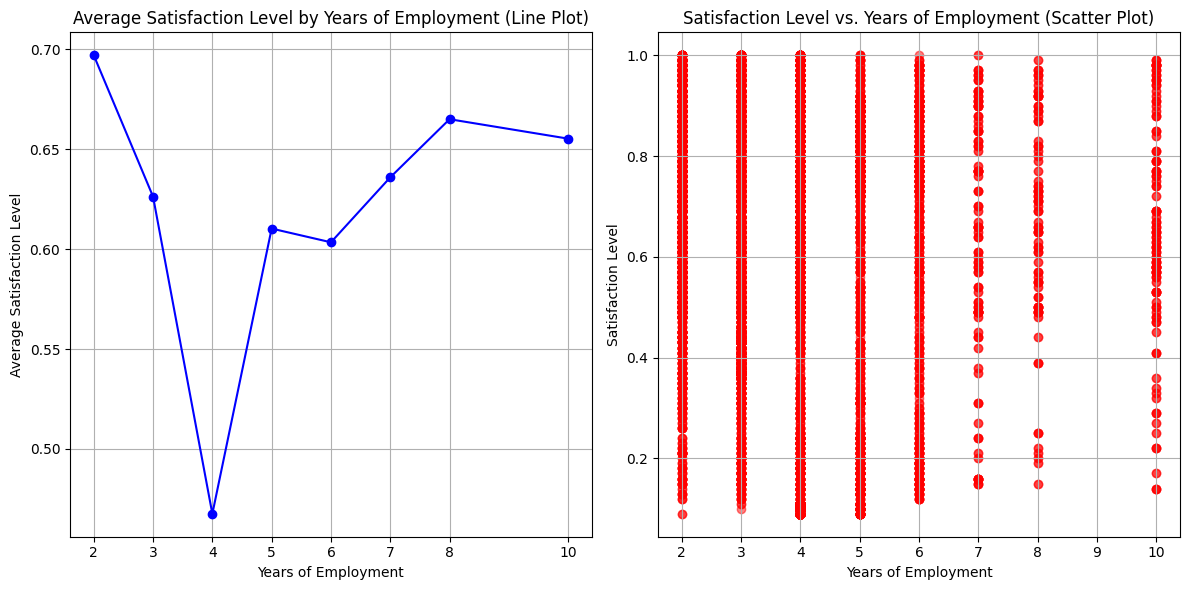

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('./HR_comma_sep - HR_comma_sep.csv')

# Check the column names to identify the correct columns
print("Column names:", df.columns)

# Group the data by 'time_spend_company' (assuming this is equivalent to 'YearsEmployed') and calculate the average satisfaction level
average_satisfaction_by_years = df.groupby('time_spend_company')['satisfaction_level'].mean()

# Plot the results
plt.figure(figsize=(12, 6))

# Line plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
average_satisfaction_by_years.plot(marker='o', color='b', linestyle='-')
plt.title('Average Satisfaction Level by Years of Employment (Line Plot)')
plt.xlabel('Years of Employment')
plt.ylabel('Average Satisfaction Level')
plt.grid(True)
plt.xticks(average_satisfaction_by_years.index)  # Set x-ticks to be the years of employment

# Scatter plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.scatter(df['time_spend_company'], df['satisfaction_level'], color='r', alpha=0.5)
plt.title('Satisfaction Level vs. Years of Employment (Scatter Plot)')
plt.xlabel('Years of Employment')
plt.ylabel('Satisfaction Level')
plt.grid(True)

plt.tight_layout()
plt.show()


2. `How many employees have spent a specific number of years (time spent in the company)?[Bar Plot]`


Number of employees by years spent in the company:
time_spend_company
3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: count, dtype: int64


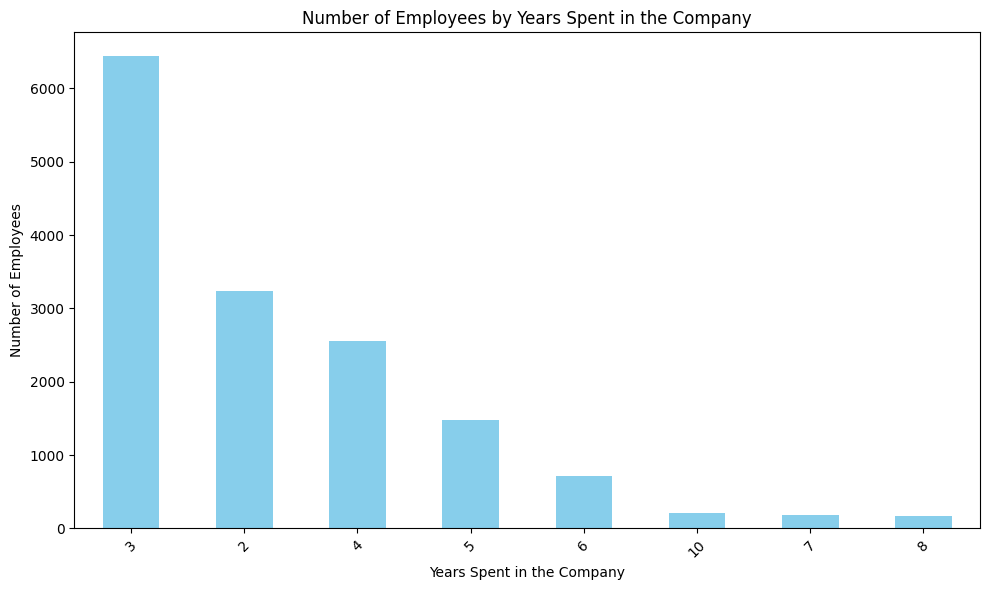

In [34]:
# Assuming 'time_spend_company' is the column representing the years spent in the company
# Use value_counts() to count the number of employees for each number of years spent
years_counts = df['time_spend_company'].value_counts()

# Display the counts
print("Number of employees by years spent in the company:")
print(years_counts)
# Plot the counts
plt.figure(figsize=(10, 6))
years_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Employees by Years Spent in the Company')
plt.xlabel('Years Spent in the Company')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.grid(axis='y')  # Add gridlines along the y-axis
plt.tight_layout()
plt.show()

3. `What is the distribution of satisfaction levels among employees?[Histogram]`

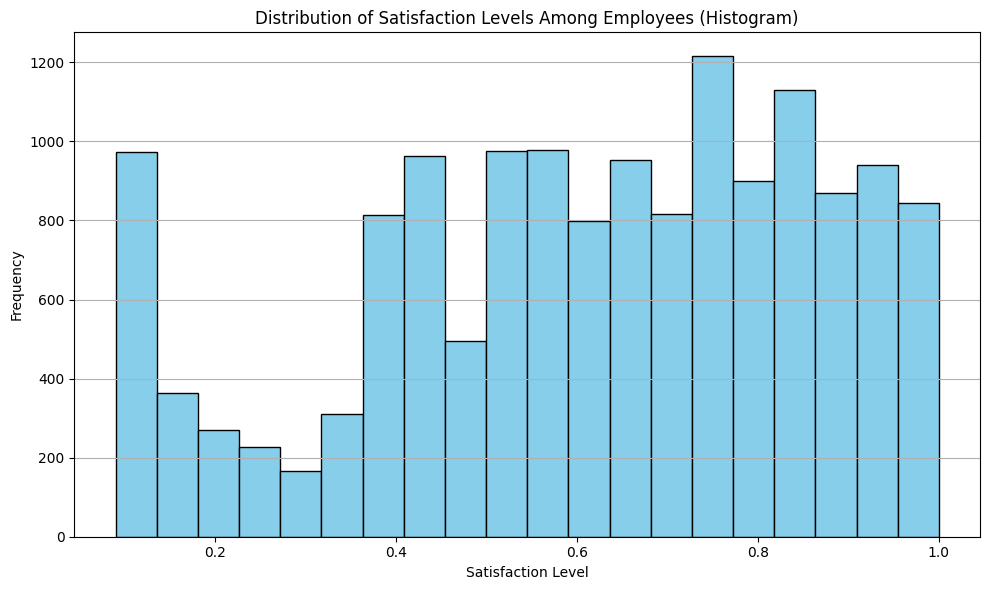

In [26]:
# Plot the distribution of satisfaction levels using a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['satisfaction_level'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Satisfaction Levels Among Employees (Histogram)')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

4. `What is the distribution of work accidents among departments?`


Department
IT             164
RandD          134
accounting      96
hr              89
management     103
marketing      138
product_mng    132
sales          587
support        345
technical      381
Name: Work_accident, dtype: int64


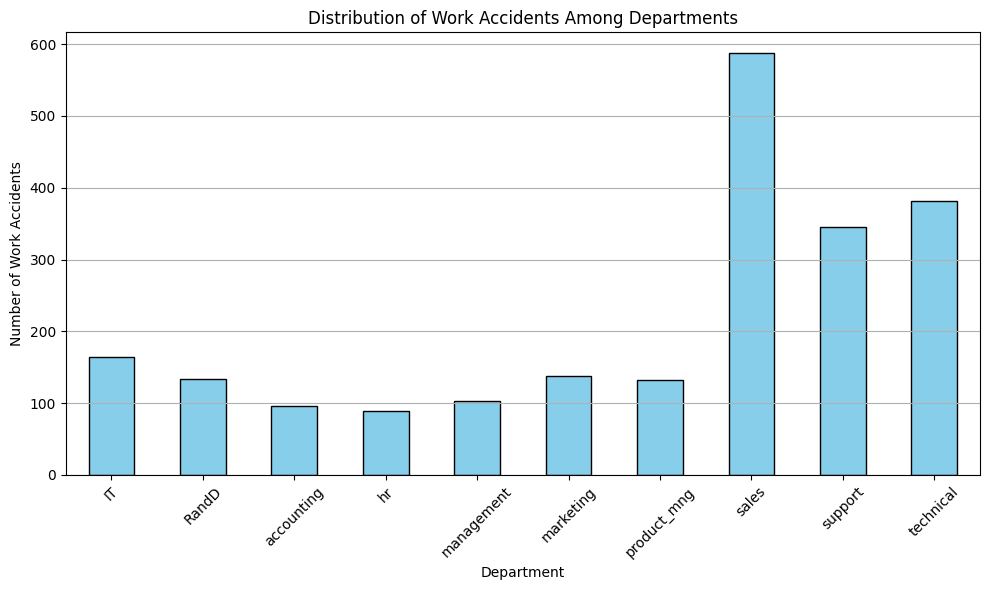

In [37]:
# Group the data by department and count the number of work accidents in each department
work_accidents_by_department = df.groupby('Department')['Work_accident'].sum()
print(work_accidents_by_department)
# Plot the distribution of work accidents among departments
plt.figure(figsize=(10, 6))
work_accidents_by_department.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Work Accidents Among Departments')
plt.xlabel('Department')
plt.ylabel('Number of Work Accidents')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.grid(axis='y')
plt.tight_layout()
plt.show()

5. `What is the distribution of promotions based on departments?`  [___________]


Department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: promotion_last_5years, dtype: int64


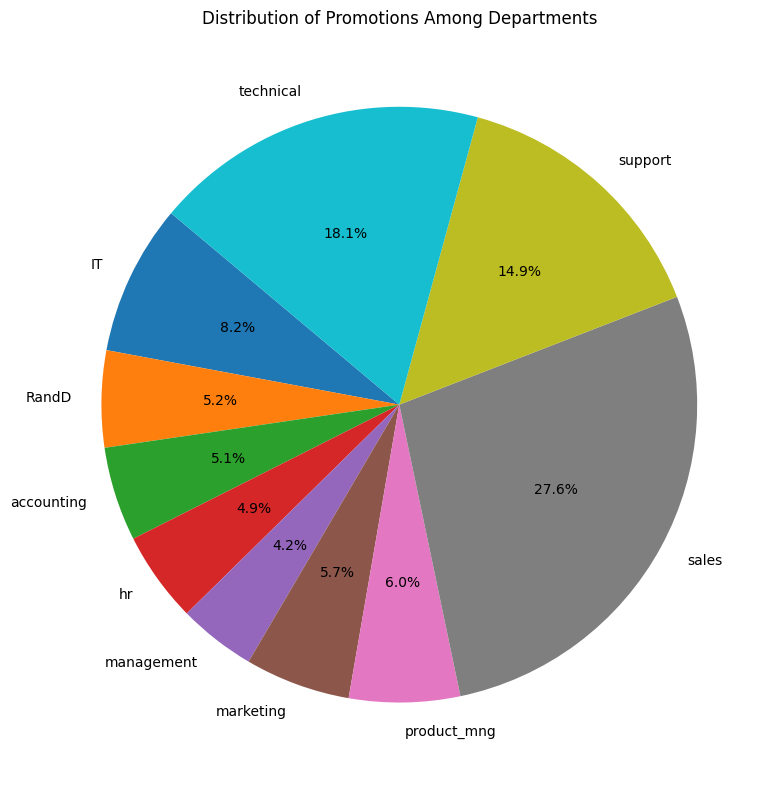

In [39]:
# Group the data by department and count the number of promotions in each department
promotions_by_department = df.groupby('Department')['promotion_last_5years'].count()
print(promotions_by_department)
# Plotting the distribution of promotions among departments as a pie chart
plt.figure(figsize=(8, 8))
promotions_by_department.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Promotions Among Departments')
plt.ylabel('')  # Remove the default ylabel which is the name of the Series
plt.tight_layout()
plt.show()

6. `How does employee satisfaction vary across different departments?` [Box Plot]

<Figure size 1000x600 with 0 Axes>

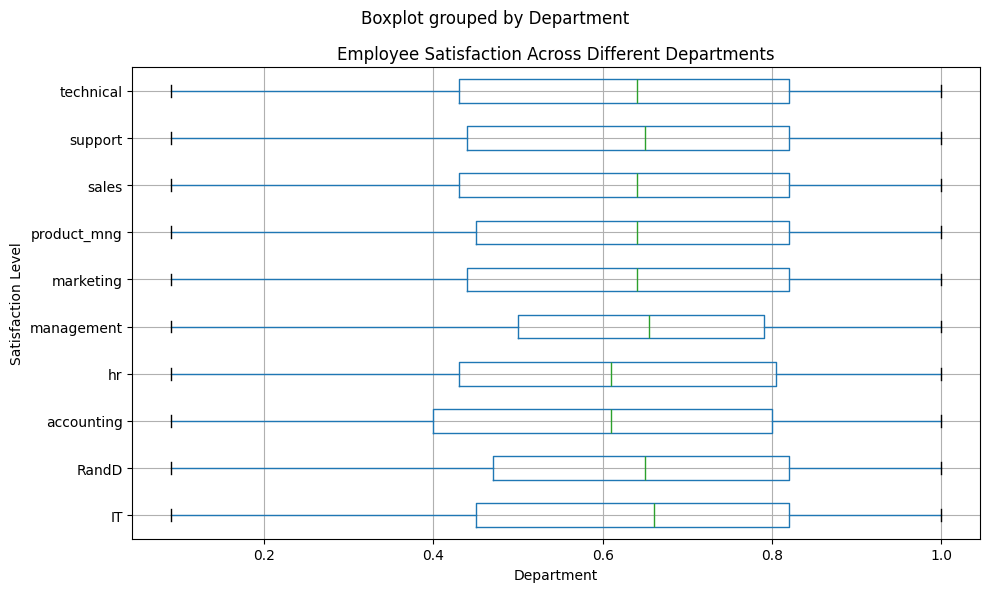

In [48]:
# Create a box plot to show employee satisfaction across different departments
plt.figure(figsize=(10, 6))
df.boxplot(column='satisfaction_level', by='Department',vert=False, figsize=(10,6))
plt.title('Employee Satisfaction Across Different Departments')
plt.xlabel('Department')
plt.ylabel('Satisfaction Level')
# plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.tight_layout()
plt.show()

7. `Figure out employee leaving status (time_spend vs satisfaction_level vs left?`
[bubble plot]

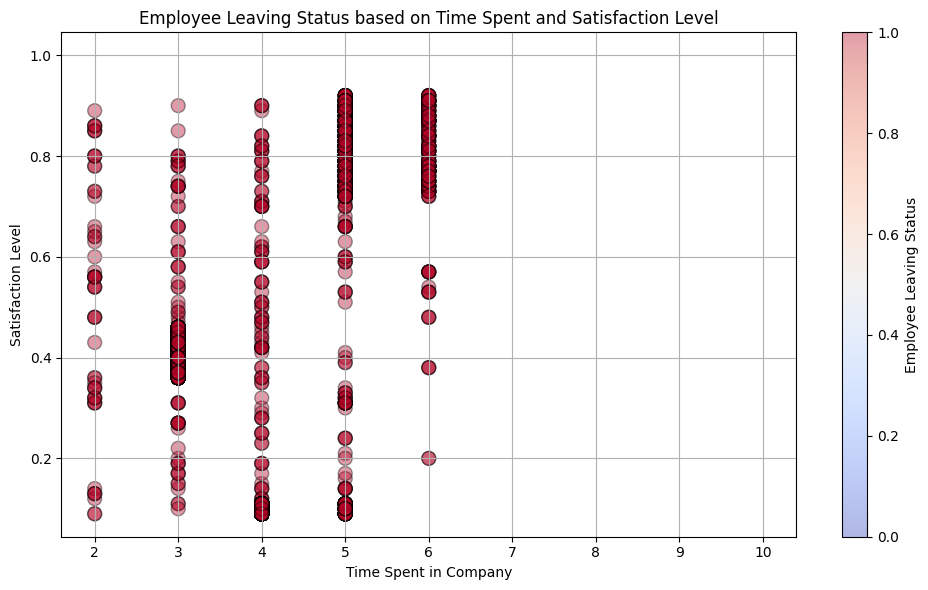

In [47]:
# Define variables for the plot
x = df['time_spend_company']
y = df['satisfaction_level']
z = df['left']  # Employee leaving status: 0 - Not left, 1 - Left

# Create a scatter plot with bubble sizes representing the employee leaving status
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, s=z*100, c=z, cmap='coolwarm', alpha=0.6, edgecolors='k')

# Add labels and title
plt.title('Employee Leaving Status based on Time Spent and Satisfaction Level')
plt.xlabel('Time Spent in Company')
plt.ylabel('Satisfaction Level')
plt.colorbar(scatter, label='Employee Leaving Status')
plt.grid(True)
plt.tight_layout()
plt.show()

8. `How are the numerical variables correlated with each other?`


<Figure size 1000x800 with 0 Axes>

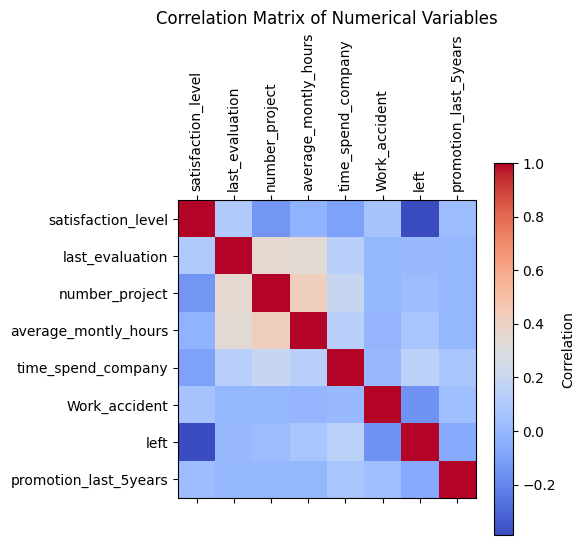

In [ ]:
# Select numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numerical_cols.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='coolwarm')
plt.colorbar(label='Correlation')
plt.title('Correlation Matrix of Numerical Variables')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

9. `How to create different scatter plots under single matplotlib figure?`


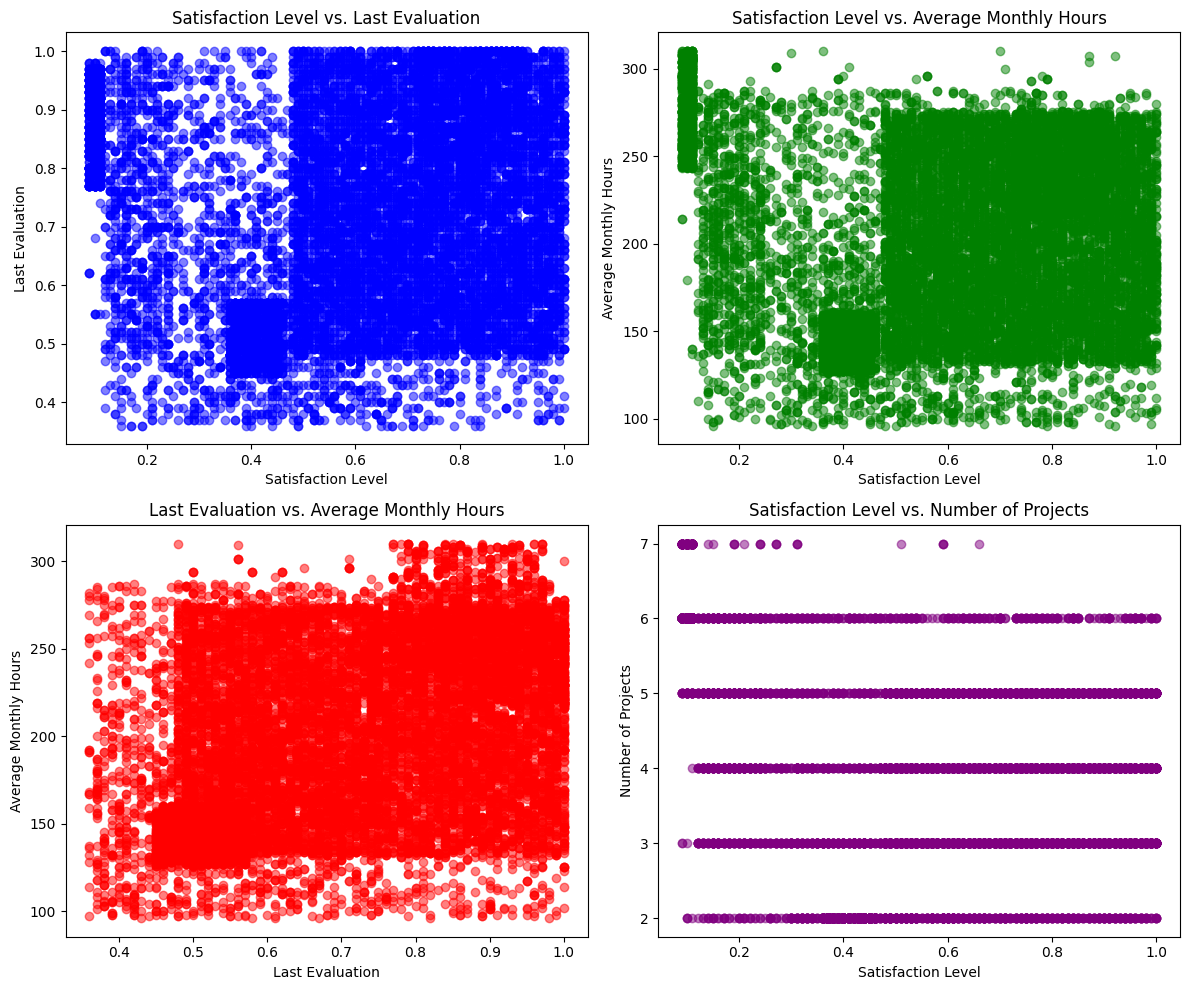

In [ ]:
# Create a Matplotlib figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Scatter plot 1: Satisfaction Level vs. Last Evaluation
axes[0, 0].scatter(df['satisfaction_level'], df['last_evaluation'], color='blue', alpha=0.5)
axes[0, 0].set_title('Satisfaction Level vs. Last Evaluation')
axes[0, 0].set_xlabel('Satisfaction Level')
axes[0, 0].set_ylabel('Last Evaluation')

# Scatter plot 2: Satisfaction Level vs. Average Monthly Hours
axes[0, 1].scatter(df['satisfaction_level'], df['average_montly_hours'], color='green', alpha=0.5)
axes[0, 1].set_title('Satisfaction Level vs. Average Monthly Hours')
axes[0, 1].set_xlabel('Satisfaction Level')
axes[0, 1].set_ylabel('Average Monthly Hours')

# Scatter plot 3: Last Evaluation vs. Average Monthly Hours
axes[1, 0].scatter(df['last_evaluation'], df['average_montly_hours'], color='red', alpha=0.5)
axes[1, 0].set_title('Last Evaluation vs. Average Monthly Hours')
axes[1, 0].set_xlabel('Last Evaluation')
axes[1, 0].set_ylabel('Average Monthly Hours')

# Scatter plot 4: Satisfaction Level vs. Number of Projects
axes[1, 1].scatter(df['satisfaction_level'], df['number_project'], color='purple', alpha=0.5)
axes[1, 1].set_title('Satisfaction Level vs. Number of Projects')
axes[1, 1].set_xlabel('Satisfaction Level')
axes[1, 1].set_ylabel('Number of Projects')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()